# ANOVA CALCULATION

### Check for statistical differences within groups. <br /> 
- **Group 4**: where there are observations for V4,V6 and V12 for all the 4 interviews
- **Group 3**: where there are observations for V4,V6 and V12 for the first 3 interviews
- **Group 2**: where there are observations for V4,V6 and V12 for the first 2 interviews
- **Group 1**: where there are observations for V4,V6 and V12 only for the first interview

#### Create a dataset with GROUPS, V2, V4, V6, V12, V17, V18

Check if V17 and V18 are relevant: <br />

for **group 1**: V17 2, 3, 4 are all missing <br />
for **group 2**: V17 only 2 with 0 missing, V18 only 2 with 1 missing <br />
for **group 3**: V18 only 3 with 1 missing, V17 only 3 with 1 missing <br />

In [1]:
# Load library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from datetime import datetime
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.mediation import Mediation
import researchpy as rp
from statsmodels.formula.api import ols

# Manage warnings
pd.set_option('mode.chained_assignment', None)

# Import csv files
Apps_clean = pd.read_csv(r'./Datasets/Apps_clean.csv')
Apps = pd.read_csv(r'./Datasets/Apps.csv')
Apps_missing = Apps.drop(list(Apps_clean.index))

group_1 = pd.read_csv(r'./Datasets/group_1.csv')
group_2 = pd.read_csv(r'./Datasets/group_2.csv')
group_3 = pd.read_csv(r'./Datasets/group_3.csv')

groups = pd.read_csv(r'./Datasets/groups.csv')


V2 and V3 count in the preprocessed and missing datasets

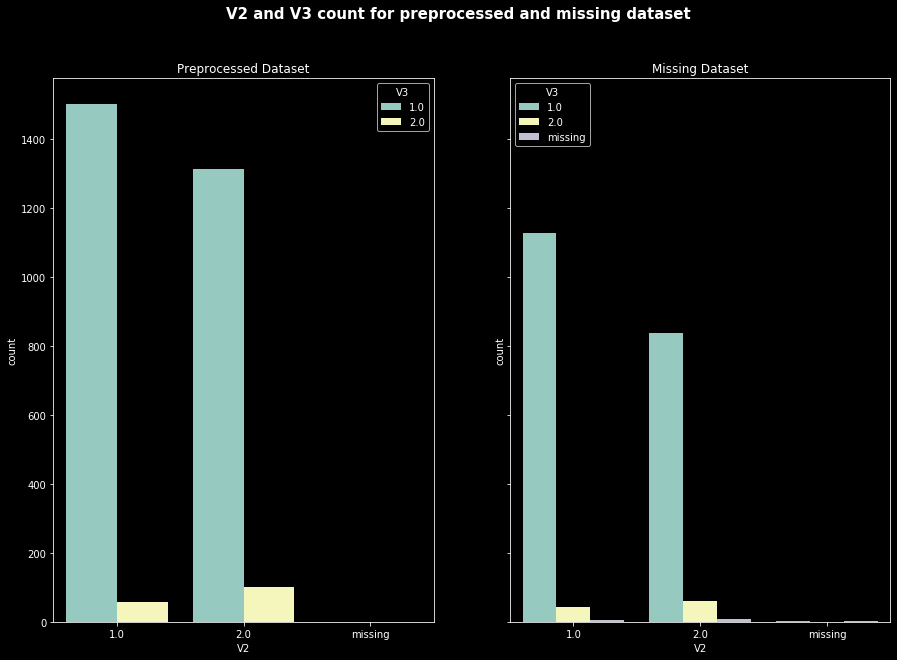

In [2]:
# General overview: frequency for V2, V3 [1, 2, missing]
Apps_missing[['V2', 'V3']] = Apps_missing[['V2', 'V3']].fillna('missing')

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize = (15,10))
fig.suptitle('V2 and V3 count for preprocessed and missing dataset', 
             fontsize=15, fontweight='bold')
axs[0].set_title('Preprocessed Dataset')
sns.countplot(x='V2', hue='V3', data=Apps_clean, ax=axs[0])
axs[1].set_title('Missing Dataset')
sns.countplot(x='V2', hue='V3', data=Apps_missing, ax=axs[1])
plt.show()

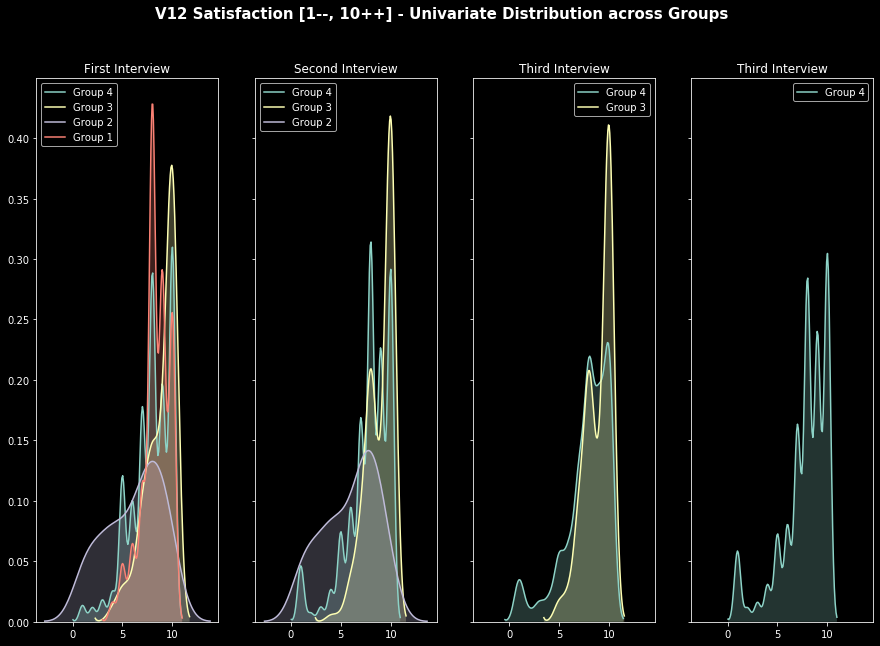

In [3]:
# V12 (Satisfaction) distribution over groups and interviews
fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(15, 10))
fig.suptitle('V12 Satisfaction [1--, 10++] -\
 Univariate Distribution across Groups',
             fontsize=15, fontweight='bold')
axs[0].set_title('First Interview')
sns.kdeplot(Apps_clean['V12_1_Interview'], shade=True, ax=axs[0],
            label='Group 4')
sns.kdeplot(group_3['V12_1_Interview'], shade=True, ax=axs[0],
            label='Group 3')
sns.kdeplot(group_2['V12_1_Interview'], shade=True, ax=axs[0],
            label='Group 2')
sns.kdeplot(group_1['V12_1_Interview'], shade=True, ax=axs[0],
            label='Group 1')
axs[1].set_title('Second Interview')
sns.kdeplot(Apps_clean['V12_2_Interview'], shade=True, ax=axs[1],
            label='Group 4')
sns.kdeplot(group_3['V12_2_Interview'], shade=True, ax=axs[1],
            label='Group 3')
sns.kdeplot(group_2['V12_2_Interview'], shade=True, ax=axs[1],
            label='Group 2')
axs[2].set_title('Third Interview')
sns.kdeplot(Apps_clean['V12_3_Interview'], shade=True, ax=axs[2],
            label='Group 4')
sns.kdeplot(group_3['V12_3_Interview'], shade=True, ax=axs[2],
            label='Group 3')
axs[3].set_title('Third Interview')
sns.kdeplot(Apps_clean['V12_4_Interview'], shade=True, ax=axs[3],
            label='Group 4')
fig.subplots_adjust(hspace=0.8)
plt.legend()
plt.show()

**COMMENT:**<br />
- **Group 4**: slight changes across interviews
- **Group 3**: mode at higher scale (10)
- **Group 2**: more spread across the values, with more values at the lower scale (< 5) compare to the other groups
- **Group 1**: mode around score 6.

Group 1 and 2 may suggest that there are some differences within the groups, but this may due to chance since there are only 76 (group 1) and 72 (group 2) observations.

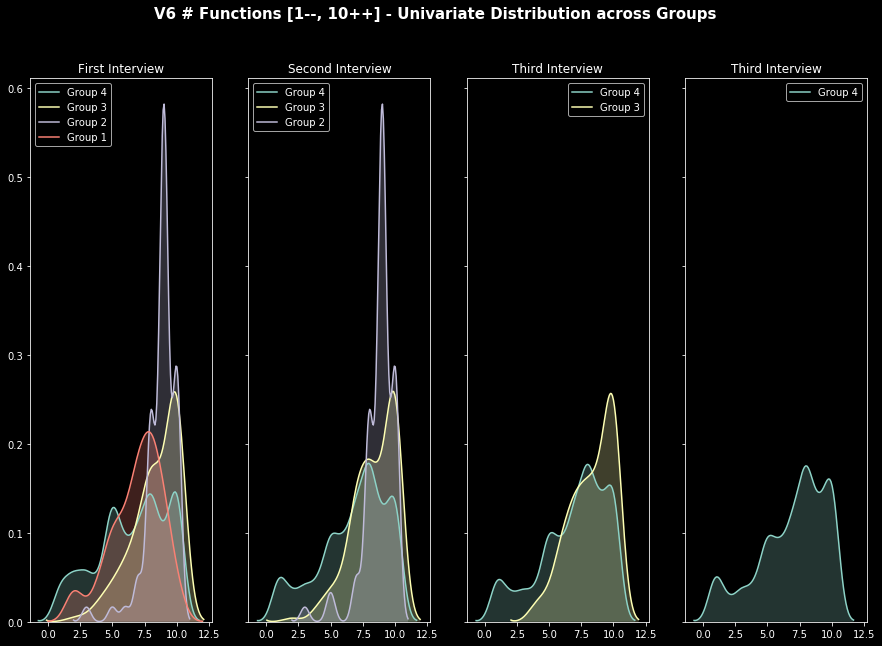

In [4]:
# V6 (number of functions) distribution over groups and interviews
fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(15, 10))
fig.suptitle('V6 # Functions [1--, 10++] -\
 Univariate Distribution across Groups',
             fontsize=15, fontweight='bold')
axs[0].set_title('First Interview')
sns.kdeplot(Apps_clean['V6_1_Interview'], shade=True, ax=axs[0],
            label='Group 4')
sns.kdeplot(group_3['V6_1_Interview'], shade=True, ax=axs[0],
            label='Group 3')
sns.kdeplot(group_2['V6_1_Interview'], shade=True, ax=axs[0],
            label='Group 2')
sns.kdeplot(group_1['V6_1_Interview'], shade=True, ax=axs[0],
            label='Group 1')
axs[1].set_title('Second Interview')
sns.kdeplot(Apps_clean['V6_2_Interview'], shade=True, ax=axs[1],
            label='Group 4')
sns.kdeplot(group_3['V6_2_Interview'], shade=True, ax=axs[1],
            label='Group 3')
sns.kdeplot(group_2['V6_2_Interview'], shade=True, ax=axs[1],
            label='Group 2')
axs[2].set_title('Third Interview')
sns.kdeplot(Apps_clean['V6_3_Interview'], shade=True, ax=axs[2],
            label='Group 4')
sns.kdeplot(group_3['V6_3_Interview'], shade=True, ax=axs[2],
            label='Group 3')
axs[3].set_title('Third Interview')
sns.kdeplot(Apps_clean['V6_4_Interview'], shade=True, ax=axs[3],
            label='Group 4')
fig.subplots_adjust(hspace=0.8)
plt.legend()
plt.show()

**COMMENT:**<br />
- **Group 4**: slight changes across interviews
- **Group 3**: mode at higher scale (10)
- **Group 2**: mode around score 8
- **Group 1**: mode around score 7.5

There is not a real trend in the data.

Only interpretation is that high number of functions brings some drop out. This seems misleading potentially due to chance and low number of observations.

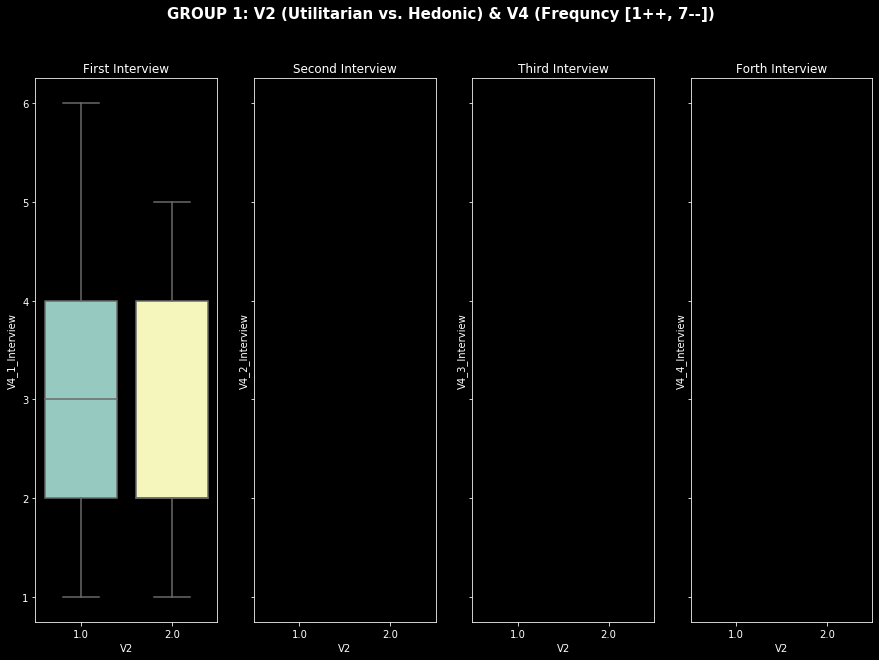

In [5]:
# V4 differences in frequency between utilitarian and hedonic V2
# GROUP 1
fig, axs = plt.subplots(nrows=1, ncols=4, sharex=True,
                        sharey=True, figsize=(15, 10))
fig.suptitle('GROUP 1: V2 (Utilitarian vs. Hedonic) & \
V4 (Frequncy [1++, 7--])',
             fontsize=15, fontweight='bold')
sns.boxplot(x='V2', y='V4_1_Interview', data=group_1,
            ax=axs[0])
axs[0].set_title('First Interview')
sns.boxplot(x='V2', y='V4_2_Interview', data=group_1,
            ax=axs[1])
axs[1].set_title('Second Interview')
sns.boxplot(x='V2', y='V4_3_Interview', data=group_1,
            ax=axs[2])
axs[2].set_title('Third Interview')
sns.boxplot(x='V2', y='V4_4_Interview', data=group_1,
            ax=axs[3])
axs[3].set_title('Forth Interview')
fig.subplots_adjust(hspace=0.8)
plt.show()

**COMMENT**:
- Not statistically different

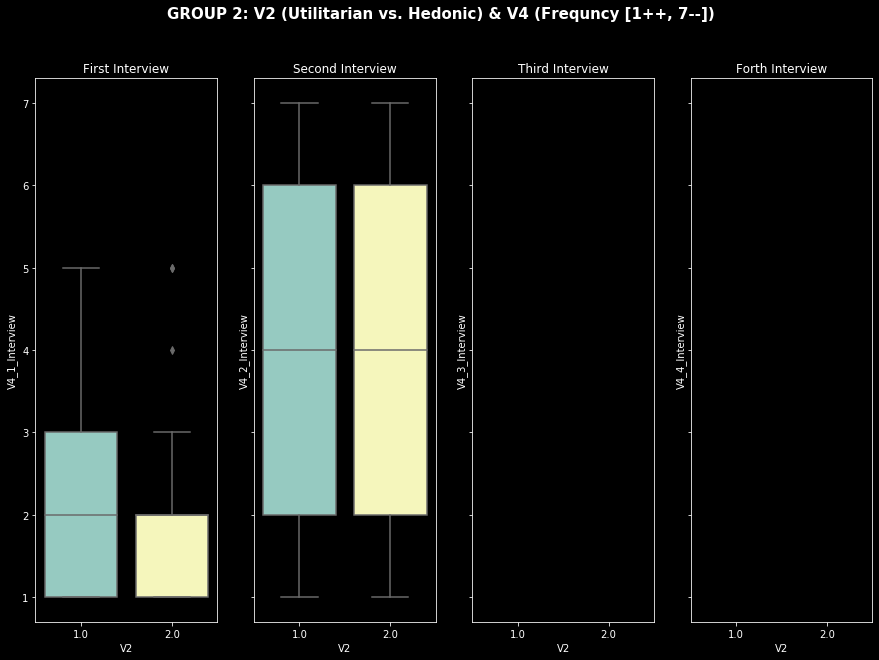

In [6]:
# V4 differences in frequency between utilitarian and hedonic V2
# GROUP 2
fig, axs = plt.subplots(nrows=1, ncols=4, sharex=True,
                        sharey=True, figsize=(15, 10))
fig.suptitle('GROUP 2: V2 (Utilitarian vs. Hedonic) & \
V4 (Frequncy [1++, 7--])',
             fontsize=15, fontweight='bold')
sns.boxplot(x='V2', y='V4_1_Interview', data=group_2,
            ax=axs[0])
axs[0].set_title('First Interview')
sns.boxplot(x='V2', y='V4_2_Interview', data=group_2,
            ax=axs[1])
axs[1].set_title('Second Interview')
sns.boxplot(x='V2', y='V4_3_Interview', data=group_2,
            ax=axs[2])
axs[2].set_title('Third Interview')
sns.boxplot(x='V2', y='V4_4_Interview', data=group_2,
            ax=axs[3])
axs[3].set_title('Forth Interview')
fig.subplots_adjust(hspace=0.8)
plt.show()

**COMMENT**: <br />
- Not statistically different
- Statistically different across interview (NOTE variance increase -low obs-)

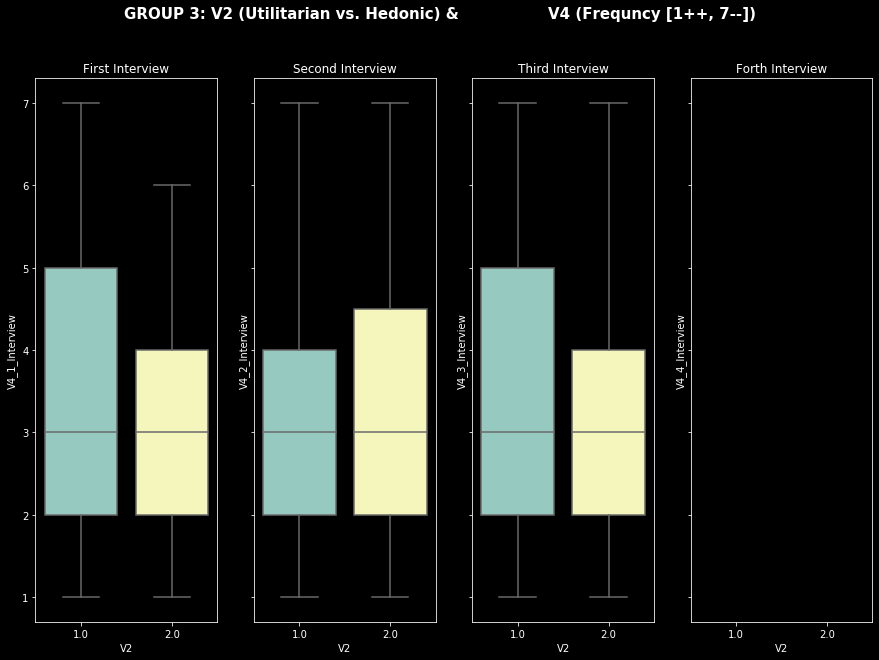

In [7]:
# V4 differences in frequency between utilitarian and hedonic V2
# GROUP 3
fig, axs = plt.subplots(nrows=1, ncols=4, sharex=True,
                        sharey=True, figsize=(15, 10))
fig.suptitle('GROUP 3: V2 (Utilitarian vs. Hedonic) & \
                V4 (Frequncy [1++, 7--])',
             fontsize=15, fontweight='bold')
sns.boxplot(x='V2', y='V4_1_Interview', data=group_3,
            ax=axs[0])
axs[0].set_title('First Interview')
sns.boxplot(x='V2', y='V4_2_Interview', data=group_3,
            ax=axs[1])
axs[1].set_title('Second Interview')
sns.boxplot(x='V2', y='V4_3_Interview', data=group_3,
            ax=axs[2])
axs[2].set_title('Third Interview')
sns.boxplot(x='V2', y='V4_4_Interview', data=group_3,
            ax=axs[3])
axs[3].set_title('Forth Interview')
fig.subplots_adjust(hspace=0.8)
plt.show()

**COMMENT**: <br />
- Not statistically different

## G4 vs G1 for V6_1_Interview

In [8]:
G4_G1 = groups.loc[(groups['Group'] == 4) | (groups['Group'] == 1), :]
rp.summary_cont(G4_G1['V6_1_Interview'].groupby(G4_G1['Group']))

,N,Mean,SD,SE,95% Conf.,Interval
Group,,,,,,
1,76,6.881579,1.993102,0.228624,6.430497,7.332660
4,2977,6.544844,2.703931,0.049557,6.447695,6.641992


In [9]:
# ANOVA with scipy.stats
stats.f_oneway(G4_G1['V6_1_Interview'][G4_G1['Group'] == 1],
               G4_G1['V6_1_Interview'][G4_G1['Group'] == 4])

F_onewayResult(statistic=1.1623959249845015, pvalue=0.2810544321936181)

**COMMENT:** <br />
- F-statistic= 1.16239 and p-value=0,281. There is not significant effect of groups 1 and 4 on V6 in period 1.

In [10]:
# Groups are not with the same size
# More robust test is the non-parametric Kruskal-Wallis H-test (1952)

stats.kruskal(G4_G1['V6_1_Interview'][G4_G1['Group'] == 1],
              G4_G1['V6_1_Interview'][G4_G1['Group'] == 4])

KruskalResult(statistic=0.37171138078511684, pvalue=0.5420728936722261)

**COMMENT**:
- KruskalResult = 0.37171 and p-value = 0.5420 There is not significant effect of groups 1 and 4 on V6 in period 1.

In [11]:
# 'C' takes care of creating a dummy. The group 1 will get captured in the
# model's intercept and is the base (control) group.
results = ols('V6_1_Interview ~ C(Group)', data=G4_G1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         V6_1_Interview   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.162
Date:                Mon, 21 Oct 2019   Prob (F-statistic):              0.281
Time:                        14:04:36   Log-Likelihood:                -7350.6
No. Observations:                3053   AIC:                         1.471e+04
Df Residuals:                    3051   BIC:                         1.472e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.8816      0.308     22.313      0.000       6.277       7.486
C(Group)[T.4]    -0.3367      0.312     -1.078      0.281      -0.949       0.276
==============================================================================
Omnibus:                      381.268   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.078
Skew:                          -0.426   Prob(JB):                     7.88e-40
Kurtosis:                       2.169   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 **COMMENT**: <br />
 The intercept group is group 1. At he bottom there are tests to check model assumptions. 
 F-stats = 1.162 and p=0.281. This tells us that there is not a significant differences
 in the group means. The coefs, are the difference in mean between the control group and
 the respective group listed.
 The intercept is the mean for the group 1 and 6.88-0.33 = 6.55 is the mean for group 4.

## G4 vs G1 for V2

In [12]:
# Contingency table or two-way analysis
tab = pd.crosstab(G4_G1['Group'], columns=G4_G1['V2'])
tab

V2,1.0,2.0
Group,,
1,43,33
4,1560,1417


In [13]:
data = G4_G1[['Group', 'V2']]
table = sm.stats.Table.from_data(data)

# Assess independence using Pearson' Chi^2
result = table.test_nominal_association()
print(result.pvalue)

0.47146202018599737


**COMMENT:** <br />
- p-value = 0,4714. There is not significant effect of groups 1 and 4 on V2.

## G4 vs G2 for V2

In [14]:
G4_G2 = groups.loc[(groups['Group'] == 4) | (groups['Group'] == 2), :]
# Contingency table or two-way analysis
tab = pd.crosstab(G4_G2['Group'], columns=G4_G2['V2'])
tab


V2,1.0,2.0
Group,,
2,33,39
4,1560,1417


In [15]:
data = G4_G2[['Group', 'V2']]
table = sm.stats.Table.from_data(data)

# Assess independence using Pearson' Chi^2
result = table.test_nominal_association()
print(result.pvalue)

0.2702138243585672


**COMMENT:** <br />
- p-value = 0,27021. There is not significant effect of groups 2 and 4 on V2.

## G4 vs G2 for V6_2_Interview

In [16]:
rp.summary_cont(G4_G2['V6_2_Interview'].groupby(G4_G2['Group']))

,N,Mean,SD,SE,95% Conf.,Interval
Group,,,,,,
2,72,8.763889,1.227537,0.144667,8.478353,9.049425
4,2977,6.772590,2.601246,0.047675,6.679131,6.866049


In [17]:
# ANOVA with scipy.stats
stats.f_oneway(G4_G2['V6_2_Interview'][G4_G2['Group'] == 2],
               G4_G2['V6_2_Interview'][G4_G2['Group'] == 4])

F_onewayResult(statistic=41.95680085729725, pvalue=1.0840166011133024e-10)

In [18]:
# Groups are not with the same size
# More robust test is the non-parametric Kruskal-Wallis H-test (1952)

stats.kruskal(G4_G2['V6_2_Interview'][G4_G2['Group'] == 2],
              G4_G2['V6_2_Interview'][G4_G2['Group'] == 4])

KruskalResult(statistic=50.36565463012, pvalue=1.2760808552345821e-12)

**COMMENT:** <br />
- p-value < 0.05. There is significant effect of groups 2 and 4 on V6 in period 2.

In [19]:
# 'C' takes care of creating a dummy. The group 2 will get captured in the
# model's intercept and is the base (control) group.
results = ols('V6_2_Interview ~ C(Group)', data=G4_G2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         V6_2_Interview   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     41.96
Date:                Mon, 21 Oct 2019   Prob (F-statistic):           1.08e-10
Time:                        14:04:37   Log-Likelihood:                -7212.3
No. Observations:                3049   AIC:                         1.443e+04
Df Residuals:                    3047   BIC:                         1.444e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.7639      0.304     28.850      0.000       8.168       9.360
C(Group)[T.4]    -1.9913      0.307     -6.477      0.000      -2.594      -1.389
==============================================================================
Omnibus:                      226.973   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              263.651
Skew:                          -0.700   Prob(JB):                     5.61e-58
Kurtosis:                       2.657   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 **COMMENT**: <br />
 The intercept group is group 2. At he bottom there are tests to check model assumptions. 
 F-stats = 41.96 and p=0.0. This tells us that there is a significant differences
 in the group means. The coefs, are the difference in mean between the control group and
 the respective group listed.
 The intercept is the mean for the group 2 and 8.76-1.99=6.77 is the mean for group 4.

## G4 vs G3 for V2

In [20]:
G4_G3 = groups.loc[(groups['Group'] == 4) | (groups['Group'] == 3), :]
# Contingency table or two-way analysis
tab = pd.crosstab(G4_G3['Group'], columns=G4_G3['V2'])
tab

V2,1.0,2.0
Group,,
3,69,83
4,1560,1417


In [21]:
data = G4_G3[['Group', 'V2']]
table = sm.stats.Table.from_data(data)

# Assess independence using Pearson' Chi^2
result = table.test_nominal_association()
print(result.pvalue)

0.09165903005958154


**COMMENT:** <br />
- p-value = 0,09. There is not significant effect of groups 3 and 4 on V2.

## G4 vs G3 for V6_3_Interview

In [22]:
rp.summary_cont(G4_G3['V6_3_Interview'].groupby(G4_G3['Group']))

,N,Mean,SD,SE,95% Conf.,Interval
Group,,,,,,
3,152,8.309211,1.672661,0.135671,8.042417,8.576004
4,2977,6.912328,2.577438,0.047239,6.819724,7.004931


In [23]:
# ANOVA with scipy.stats
stats.f_oneway(G4_G3['V6_3_Interview'][G4_G3['Group'] == 3],
               G4_G3['V6_3_Interview'][G4_G3['Group'] == 4])

F_onewayResult(statistic=43.699120143908004, pvalue=4.4855160062275706e-11)

In [24]:
# Groups are not with the same size
# More robust test is the non-parametric Kruskal-Wallis H-test (1952)

stats.kruskal(G4_G3['V6_3_Interview'][G4_G3['Group'] == 3],
              G4_G3['V6_3_Interview'][G4_G3['Group'] == 4])

KruskalResult(statistic=43.090159244065305, pvalue=5.227452471180232e-11)

**COMMENT:** <br />
- p-value < 0.05. There is significant effect of groups 3 and 4 on V6 in period 3.

In [25]:
# 'C' takes care of creating a dummy. The group 3 will get captured in the
# model's intercept and is the base (control) group.
results = ols('V6_3_Interview ~ C(Group)', data=G4_G3).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         V6_3_Interview   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     43.70
Date:                Mon, 21 Oct 2019   Prob (F-statistic):           4.49e-11
Time:                        14:04:38   Log-Likelihood:                -7357.0
No. Observations:                3129   AIC:                         1.472e+04
Df Residuals:                    3127   BIC:                         1.473e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.3092      0.206     40.313      0.000       7.905       8.713
C(Group)[T.4]    -1.3969      0.211     -6.611      0.000      -1.811      -0.983
==============================================================================
Omnibus:                      254.588   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.042
Skew:                          -0.772   Prob(JB):                     2.36e-69
Kurtosis:                       2.794   Cond. No.                         8.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 **COMMENT**: <br />
 The intercept group is group 3. At he bottom there are tests to check model assumptions. 
 F-stats = 43.7 and p=0.0. This tells us that there is a significant differences
 in the group means. The coefs, are the difference in mean between the control group and
 the respective group listed.
 The intercept is the mean for the group 3 and 8.30-1.39= 6.91 is the mean for group 4.

## G4 vs G1 for V4_1_Interview

In [26]:
rp.summary_cont(G4_G1['V4_1_Interview'].groupby(G4_G1['Group']))

,N,Mean,SD,SE,95% Conf.,Interval
Group,,,,,,
1,76,2.921053,1.449259,0.166241,2.593055,3.249051
4,2977,3.051058,1.720981,0.031542,2.989226,3.112890


In [27]:
# ANOVA with scipy.stats
stats.f_oneway(G4_G1['V4_1_Interview'][G4_G1['Group'] == 1],
               G4_G1['V4_1_Interview'][G4_G1['Group'] == 4])

F_onewayResult(statistic=0.4259447206335561, pvalue=0.5140347205617165)

In [28]:
# Groups are not with the same size
# More robust test is the non-parametric Kruskal-Wallis H-test (1952)

stats.kruskal(G4_G1['V4_1_Interview'][G4_G1['Group'] == 1],
              G4_G1['V4_1_Interview'][G4_G1['Group'] == 4])

KruskalResult(statistic=0.07860034301048169, pvalue=0.779203219321046)

**COMMENT**:
- p-value = 0.77 There is not significant effect of groups 1 and 4 on V4 in period 1.

## G4 vs G1 for V12_1_Interview

In [29]:
rp.summary_cont(G4_G1['V12_1_Interview'].groupby(G4_G1['Group']))

,N,Mean,SD,SE,95% Conf.,Interval
Group,,,,,,
1,76,8.289474,1.374198,0.157631,7.978463,8.600484
4,2977,7.778636,1.988130,0.036438,7.707206,7.850067


In [30]:
# ANOVA with scipy.stats
stats.f_oneway(G4_G1['V12_1_Interview'][G4_G1['Group'] == 1],
               G4_G1['V12_1_Interview'][G4_G1['Group'] == 4])

F_onewayResult(statistic=4.956247015413843, pvalue=0.02606933317168642)

In [31]:
# Groups are not with the same size
# More robust test is the non-parametric Kruskal-Wallis H-test (1952)

stats.kruskal(G4_G1['V12_1_Interview'][G4_G1['Group'] == 1],
              G4_G1['V12_1_Interview'][G4_G1['Group'] == 4])

KruskalResult(statistic=3.2046709891808054, pvalue=0.07342827587928392)

**COMMENT**:
- Kruskal p-value = 0.07 There is not significant effect of groups 1 and 4 on V12 in period 1.

In [32]:
# 'C' takes care of creating a dummy. The group 1 will get captured in the
# model's intercept and is the base (control) group.
results = ols('V12_1_Interview ~ C(Group)', data=G4_G1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        V12_1_Interview   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.956
Date:                Mon, 21 Oct 2019   Prob (F-statistic):             0.0261
Time:                        14:04:38   Log-Likelihood:                -6409.3
No. Observations:                3053   AIC:                         1.282e+04
Df Residuals:                    3051   BIC:                         1.283e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2895      0.227     36.584      0.000       7.845       8.734
C(Group)[T.4]    -0.5108      0.229     -2.226      0.026      -0.961      -0.061
==============================================================================
Omnibus:                      369.517   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              516.864
Skew:                          -0.942   Prob(JB):                    5.81e-113
Kurtosis:                       3.716   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**COMMENT**:
p-value < 0.05. There is significant effect of groups 1 and 4 on V12 in period 1. If we calculate a more robust test, the non-parametric Kruskal-Wallis H-test (1952), p > 0.05, not significance. The intercept is the mean for the group 1 and 8.28-0.51= 7.778 is the mean for group 4. The mean satisfaction is higher for the observation in the first group.

## G4 vs G2 for V4_2_Interview

In [33]:
rp.summary_cont(G4_G2['V4_2_Interview'].groupby(G4_G2['Group']))

,N,Mean,SD,SE,95% Conf.,Interval
Group,,,,,,
2,72,3.888889,2.126662,0.250630,3.394208,4.383570
4,2977,3.143769,1.877504,0.034411,3.076313,3.211225


In [34]:
# ANOVA with scipy.stats
stats.f_oneway(G4_G2['V4_2_Interview'][G4_G2['Group'] == 2],
               G4_G2['V4_2_Interview'][G4_G2['Group'] == 4])

F_onewayResult(statistic=10.999924601284615, pvalue=0.0009218416685202244)

In [35]:
# Groups are not with the same size
# More robust test is the non-parametric Kruskal-Wallis H-test (1952)

stats.kruskal(G4_G2['V4_2_Interview'][G4_G2['Group'] == 2],
              G4_G2['V4_2_Interview'][G4_G2['Group'] == 4])

KruskalResult(statistic=8.713089317053297, pvalue=0.0031593336520372773)

In [36]:
# 'C' takes care of creating a dummy. The group 2 will get captured in the
# model's intercept and is the base (control) group.
results = ols('V4_2_Interview ~ C(Group)', data=G4_G2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         V4_2_Interview   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     11.00
Date:                Mon, 21 Oct 2019   Prob (F-statistic):           0.000922
Time:                        14:04:39   Log-Likelihood:                -6256.1
No. Observations:                3049   AIC:                         1.252e+04
Df Residuals:                    3047   BIC:                         1.253e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.8889      0.222     17.518      0.000       3.454       4.324
C(Group)[T.4]    -0.7451      0.225     -3.317      0.001      -1.186      -0.305
==============================================================================
Omnibus:                      361.056   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              214.169
Skew:                           0.516   Prob(JB):                     3.12e-47
Kurtosis:                       2.213   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**COMMENT**: <br />
p-value < 0.05. There is significant effect of groups 2 and 4 on V4 in period 2. The intercept is the mean for the group 2 and 3.888-0.745= 3.143 is the mean for group 4. The mean usage frequency is higher for the observation in the fourth group. (with V4 less is more).

## G4 vs G2 for V12_2_Interview

In [37]:
rp.summary_cont(G4_G2['V12_2_Interview'].groupby(G4_G2['Group']))

,N,Mean,SD,SE,95% Conf.,Interval
Group,,,,,,
2,72,5.972222,2.695705,0.317692,5.345177,6.599268
4,2977,7.757138,2.145529,0.039323,7.680052,7.834224


In [38]:
# ANOVA with scipy.stats
stats.f_oneway(G4_G2['V12_2_Interview'][G4_G2['Group'] == 2],
               G4_G2['V12_2_Interview'][G4_G2['Group'] == 4])

F_onewayResult(statistic=48.00695150244186, pvalue=5.16091703207342e-12)

In [39]:
# Groups are not with the same size
# More robust test is the non-parametric Kruskal-Wallis H-test (1952)

stats.kruskal(G4_G2['V12_2_Interview'][G4_G2['Group'] == 2],
              G4_G2['V12_2_Interview'][G4_G2['Group'] == 4])

KruskalResult(statistic=34.833305301317445, pvalue=3.5917626595461374e-09)

In [40]:
# 'C' takes care of creating a dummy. The group 2 will get captured in the
# model's intercept and is the base (control) group.
results = ols('V12_2_Interview ~ C(Group)', data=G4_G2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        V12_2_Interview   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     48.01
Date:                Mon, 21 Oct 2019   Prob (F-statistic):           5.16e-12
Time:                        14:04:39   Log-Likelihood:                -6673.3
No. Observations:                3049   AIC:                         1.335e+04
Df Residuals:                    3047   BIC:                         1.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.9722      0.255     23.462      0.000       5.473       6.471
C(Group)[T.4]     1.7849      0.258      6.929      0.000       1.280       2.290
==============================================================================
Omnibus:                      661.065   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1264.016
Skew:                          -1.318   Prob(JB):                    3.33e-275
Kurtosis:                       4.734   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**COMMENT**: <br />
p-value < 0.05. There is significant effect of groups 2 and 4 on V12 in period 2. The intercept is the mean for the group 2 and 5.9722+1.7849= 7.7571 is the mean for group 4. The mean satisfaction is higher for the observations in the fourth group.

## G4 vs G2 for V17_2_Interview

In [41]:
rp.summary_cont(G4_G2['V17_2_Interview'].groupby(G4_G2['Group']))

,N,Mean,SD,SE,95% Conf.,Interval
Group,,,,,,
2,72,7.694444,2.093847,0.246762,7.207396,8.181492
4,2977,6.376554,3.280097,0.060117,6.258704,6.494403


In [42]:
# ANOVA with scipy.stats
stats.f_oneway(G4_G2['V17_2_Interview'][G4_G2['Group'] == 2],
               G4_G2['V17_2_Interview'][G4_G2['Group'] == 4])

F_onewayResult(statistic=11.507404711119355, pvalue=0.0007020371751618326)

In [43]:
# Groups are not with the same size
# More robust test is the non-parametric Kruskal-Wallis H-test (1952)

stats.kruskal(G4_G2['V17_2_Interview'][G4_G2['Group'] == 2],
              G4_G2['V17_2_Interview'][G4_G2['Group'] == 4])

KruskalResult(statistic=7.781805867317576, pvalue=0.005277501608751762)

In [44]:
# 'C' takes care of creating a dummy. The group 2 will get captured in the
# model's intercept and is the base (control) group.
results = ols('V17_2_Interview ~ C(Group)', data=G4_G2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        V17_2_Interview   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     11.51
Date:                Mon, 21 Oct 2019   Prob (F-statistic):           0.000702
Time:                        14:04:40   Log-Likelihood:                -7926.0
No. Observations:                3049   AIC:                         1.586e+04
Df Residuals:                    3047   BIC:                         1.587e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6944      0.384     20.044      0.000       6.942       8.447
C(Group)[T.4]    -1.3179      0.388     -3.392      0.001      -2.080      -0.556
==============================================================================
Omnibus:                     2814.288   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              287.132
Skew:                          -0.447   Prob(JB):                     4.47e-63
Kurtosis:                       1.792   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**COMMENT**: <br />
p-value < 0.05. There is significant difference between groups 2 and 4 for V17 (Habit) in period 2. The intercept is the mean for the group 2 and 7.6944-1.3179 = 6.3765 is the mean for group 4. The mean habit is higher for the observations in the 2 group.

## G4 vs G2 for V18_2_Interview

In [45]:
rp.summary_cont(G4_G2['V18_2_Interview'].groupby(G4_G2['Group']))

,N,Mean,SD,SE,95% Conf.,Interval
Group,,,,,,
2,71,7.605634,1.792675,0.212751,7.185673,8.025594
4,2977,4.898556,3.181313,0.058307,4.784256,5.012856


In [46]:
# ANOVA with scipy.stats
stats.f_oneway(G4_G2['V18_2_Interview'].dropna()[G4_G2['Group'] == 2],
               G4_G2['V18_2_Interview'].dropna()[G4_G2['Group'] == 4])

F_onewayResult(statistic=51.01246318036885, pvalue=1.1430480464536644e-12)

In [47]:
# Groups are not with the same size
# More robust test is the non-parametric Kruskal-Wallis H-test (1952)

stats.kruskal(G4_G2['V18_2_Interview'].dropna()[G4_G2['Group'] == 2],
              G4_G2['V18_2_Interview'].dropna()[G4_G2['Group'] == 4])

KruskalResult(statistic=48.754740883184716, pvalue=2.9005656982700745e-12)

In [48]:
# 'C' takes care of creating a dummy. The group 2 will get captured in the
# model's intercept and is the base (control) group.
results = ols('V18_2_Interview ~ C(Group)', data=G4_G2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        V18_2_Interview   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     51.01
Date:                Mon, 21 Oct 2019   Prob (F-statistic):           1.14e-12
Time:                        14:04:40   Log-Likelihood:                -7827.3
No. Observations:                3048   AIC:                         1.566e+04
Df Residuals:                    3046   BIC:                         1.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6056      0.375     20.304      0.000       6.871       8.340
C(Group)[T.4]    -2.7071      0.379     -7.142      0.000      -3.450      -1.964
==============================================================================
Omnibus:                    91832.069   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.245
Skew:                           0.173   Prob(JB):                     2.05e-54
Kurtosis:                       1.648   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**COMMENT**: <br />
p-value < 0.05. There is significant difference between groups 2 and 4 for V18 (Flow) in period 2. The intercept is the mean for the group 2 and 7.6056-2.7071 = 4.8985 is the mean for group 4. The mean flow is higher for the observations in the 2 group.

## G4 vs G3 for V4_3_Interview

In [49]:
rp.summary_cont(G4_G3['V4_3_Interview'].groupby(G4_G3['Group']))

,N,Mean,SD,SE,95% Conf.,Interval
Group,,,,,,
3,152,3.328947,1.678758,0.136165,3.061181,3.596714
4,2977,3.200873,1.889227,0.034625,3.132996,3.268751


In [50]:
# ANOVA with scipy.stats
stats.f_oneway(G4_G3['V4_3_Interview'][G4_G3['Group'] == 3],
               G4_G3['V4_3_Interview'][G4_G3['Group'] == 4])

F_onewayResult(statistic=0.6714372877753233, pvalue=0.41261339893247195)

In [51]:
# Groups are not with the same size
# More robust test is the non-parametric Kruskal-Wallis H-test (1952)

stats.kruskal(G4_G3['V4_3_Interview'][G4_G3['Group'] == 3],
              G4_G3['V4_3_Interview'][G4_G3['Group'] == 4])

KruskalResult(statistic=1.7517796857205248, pvalue=0.18565315742933958)

**COMMENT:** <br />
- p-value > 0.05. There is not significant difference between groups 3 and 4 for V4 in period 3.

## G4 vs G3 for V12_3_Interview

In [52]:
rp.summary_cont(G4_G3['V12_3_Interview'].groupby(G4_G3['Group']))

,N,Mean,SD,SE,95% Conf.,Interval
Group,,,,,,
3,152,8.907895,1.313986,0.106578,8.698311,9.117479
4,2977,7.752435,2.256304,0.041353,7.671370,7.833501


In [53]:
# ANOVA with scipy.stats
stats.f_oneway(G4_G3['V12_3_Interview'][G4_G3['Group'] == 3],
               G4_G3['V12_3_Interview'][G4_G3['Group'] == 4])

F_onewayResult(statistic=39.17564028539552, pvalue=4.4016685822688734e-10)

In [54]:
# Groups are not with the same size
# More robust test is the non-parametric Kruskal-Wallis H-test (1952)

stats.kruskal(G4_G3['V12_3_Interview'][G4_G3['Group'] == 3],
              G4_G3['V12_3_Interview'][G4_G3['Group'] == 4])

KruskalResult(statistic=43.93925209987002, pvalue=3.3872727348232465e-11)

In [55]:
# 'C' takes care of creating a dummy. The group 3 will get captured in the
# model's intercept and is the base (control) group.
results = ols('V12_3_Interview ~ C(Group)', data=G4_G3).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        V12_3_Interview   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     39.18
Date:                Mon, 21 Oct 2019   Prob (F-statistic):           4.40e-10
Time:                        14:04:40   Log-Likelihood:                -6934.3
No. Observations:                3129   AIC:                         1.387e+04
Df Residuals:                    3127   BIC:                         1.388e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.9079      0.180     49.470      0.000       8.555       9.261
C(Group)[T.4]    -1.1555      0.185     -6.259      0.000      -1.517      -0.793
==============================================================================
Omnibus:                      691.126   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1305.995
Skew:                          -1.355   Prob(JB):                    2.55e-284
Kurtosis:                       4.634   Cond. No.                         8.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**COMMENT**: <br />
p-value < 0.05. There is significant difference between groups 3 and 4 for V12 (Satisfaction) in period 3. The intercept is the mean for the group 3 and 8.9079-1.1555 = 7.7524 is the mean for group 4. The mean satisfaction is higher for the observations in group 3.

## G4 vs G3 for V17_3_Interview

In [56]:
rp.summary_cont(G4_G3['V17_3_Interview'].groupby(G4_G3['Group']))

,N,Mean,SD,SE,95% Conf.,Interval
Group,,,,,,
3,151,7.251656,3.162738,0.257380,6.745512,7.757799
4,2977,6.443063,3.235109,0.059292,6.326831,6.559296


In [57]:
# ANOVA with scipy.stats
stats.f_oneway(G4_G3['V17_3_Interview'].dropna()[G4_G3['Group'] == 3],
               G4_G3['V17_3_Interview'].dropna()[G4_G3['Group'] == 4])

F_onewayResult(statistic=8.996908049396623, pvalue=0.002725700962761073)

In [58]:
# Groups are not with the same size
# More robust test is the non-parametric Kruskal-Wallis H-test (1952)

stats.kruskal(G4_G3['V17_3_Interview'].dropna()[G4_G3['Group'] == 3],
              G4_G3['V17_3_Interview'].dropna()[G4_G3['Group'] == 4])

KruskalResult(statistic=10.963999666579348, pvalue=0.0009289908289833356)

In [59]:
# 'C' takes care of creating a dummy. The group 3 will get captured in the
# model's intercept and is the base (control) group.
results = ols('V17_3_Interview ~ C(Group)', data=G4_G3).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        V17_3_Interview   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     8.997
Date:                Mon, 21 Oct 2019   Prob (F-statistic):            0.00273
Time:                        14:04:41   Log-Likelihood:                -8106.6
No. Observations:                3128   AIC:                         1.622e+04
Df Residuals:                    3126   BIC:                         1.623e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.2517      0.263     27.574      0.000       6.736       7.767
C(Group)[T.4]    -0.8086      0.270     -2.999      0.003      -1.337      -0.280
==============================================================================
Omnibus:                     1831.243   Durbin-Watson:                   1.675
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              301.578
Skew:                          -0.499   Prob(JB):                     3.26e-66
Kurtosis:                       1.853   Cond. No.                         8.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**COMMENT**: <br />
p-value < 0.05. There is significant difference between groups 3 and 4 for V17 (habit) in period 3. The intercept is the mean for the group 3 and 7.2517-0.8086 = 6.4430 is the mean for group 4. The mean habit is higher for the observations in group 3.

## G4 vs G3 for V18_3_Interview

In [60]:
rp.summary_cont(G4_G3['V18_3_Interview'].groupby(G4_G3['Group']))

,N,Mean,SD,SE,95% Conf.,Interval
Group,,,,,,
3,151,5.688742,3.477902,0.283028,5.132161,6.245322
4,2977,5.090359,3.224293,0.059094,4.974515,5.206204


In [61]:
# ANOVA with scipy.stats
stats.f_oneway(G4_G3['V18_3_Interview'].dropna()[G4_G3['Group'] == 3],
               G4_G3['V18_3_Interview'].dropna()[G4_G3['Group'] == 4])

F_onewayResult(statistic=4.911153992782943, pvalue=0.026755565424015405)

In [62]:
# Groups are not with the same size
# More robust test is the non-parametric Kruskal-Wallis H-test (1952)

stats.kruskal(G4_G3['V18_3_Interview'].dropna()[G4_G3['Group'] == 3],
              G4_G3['V18_3_Interview'].dropna()[G4_G3['Group'] == 4])

KruskalResult(statistic=4.688717447065227, pvalue=0.030361301521474485)

In [63]:
# 'C' takes care of creating a dummy. The group 3 will get captured in the
# model's intercept and is the base (control) group.
results = ols('V18_3_Interview ~ C(Group)', data=G4_G3).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        V18_3_Interview   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.911
Date:                Mon, 21 Oct 2019   Prob (F-statistic):             0.0268
Time:                        14:04:41   Log-Likelihood:                -8111.7
No. Observations:                3128   AIC:                         1.623e+04
Df Residuals:                    3126   BIC:                         1.624e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.6887      0.263     21.596      0.000       5.172       6.205
C(Group)[T.4]    -0.5984      0.270     -2.216      0.027      -1.128      -0.069
==============================================================================
Omnibus:                    27492.033   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              265.956
Skew:                           0.071   Prob(JB):                     1.77e-58
Kurtosis:                       1.579   Cond. No.                         8.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**COMMENT**: <br />
p-value < 0.05. There is significant difference between groups 3 and 4 for V18 (flow) in period 3. The intercept is the mean for the group 3 and 5.6887-0.5984 = 5.0903 is the mean for group 4. The mean flow is higher for the observations in group 3.